In [161]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
#Setting Datasets

#Defensive Line Data
DL2010 = "Resources/DL2010.csv"
DL2011 = "Resources/DL2011.csv"
DL2012 = "Resources/DL2012.csv"
DL2013 = "Resources/DL2013.csv"
DL2014 = "Resources/DL2014.csv"
DL2015 = "Resources/DL2015.csv"

#Defensive Backs Data
FS2010to2015 = "Resources/FS2010to2015.csv"
SS2010to2015 = "Resources/SS2010to2015.csv"
CB2010to2012 = "Resources/CB2010to2012.csv"
CB2013to2015 = "Resources/CB2013to2015.csv"

#Pro Bowl Data
PB2011 = "Resources/ProBowl2011.csv"
PB2012 = "Resources/ProBowl2012.csv"
PB2013 = "Resources/ProBowl2013.csv"
PB2014 = "Resources/ProBowl2014.csv"
PB2015 = "Resources/ProBowl2015.csv"
PB2016 = "Resources/ProBowl2016.csv"
PB2017 = "Resources/ProBowl2017.csv"
PB2018 = "Resources/ProBowl2018.csv"

In [ ]:
sdfsadfasdfsfasd

In [151]:
#Loading into DataFrame

#DL DataFrame
DL_2010_df = pd.read_csv(DL2010, encoding="utf-8")
DL_2011_df = pd.read_csv(DL2011, encoding="utf-8")
DL_2012_df = pd.read_csv(DL2012, encoding="utf-8")
DL_2013_df = pd.read_csv(DL2013, encoding="utf-8")
DL_2014_df = pd.read_csv(DL2014, encoding="utf-8")
DL_2015_df = pd.read_csv(DL2015, encoding="utf-8")

#DB DataFrame
FS_2010to2015_df = pd.read_csv(FS2010to2015, encoding="utf-8")
SS_2010to2015_df = pd.read_csv(SS2010to2015, encoding="utf-8")
CB_2010to2012_df = pd.read_csv(CB2010to2012, encoding="utf-8")
CB_2013to2015_df = pd.read_csv(CB2013to2015, encoding="utf-8")

#ProBowl DataFrames
PB2011_df = pd.read_csv(PB2011, encoding='utf-8')
PB2012_df = pd.read_csv(PB2012, encoding='utf-8')
PB2013_df = pd.read_csv(PB2013, encoding='utf-8')
PB2014_df = pd.read_csv(PB2014, encoding='utf-8')
PB2015_df = pd.read_csv(PB2015, encoding='utf-8')
PB2016_df = pd.read_csv(PB2016, encoding='utf-8')
PB2017_df = pd.read_csv(PB2017, encoding='utf-8')
PB2018_df = pd.read_csv(PB2018, encoding='utf-8')

In [152]:
#Replacing names of positions for easier data analysis

#Defensive end & defensive tackle converted to defensive line allocation
DL_2010_df['Pos'] = DL_2010_df['Pos'].replace(
   {'DE': 'DL', 'DT': 'DL'})
DL_2011_df['Pos'] = DL_2011_df['Pos'].replace(
   {'DE': 'DL', 'DT': 'DL'})
DL_2012_df['Pos'] = DL_2012_df['Pos'].replace(
   {'DE': 'DL', 'DT': 'DL'})
DL_2013_df['Pos'] = DL_2013_df['Pos'].replace(
   {'DE': 'DL', 'DT': 'DL'})   
DL_2014_df['Pos'] = DL_2014_df['Pos'].replace(
   {'DE': 'DL', 'DT': 'DL'})
DL_2015_df['Pos'] = DL_2015_df['Pos'].replace(
   {'DE': 'DL', 'DT': 'DL'})

#Cornerbacks and Safeties converted to defensive back allocation
FS_2010to2015_df['Pos'] = FS_2010to2015_df['Pos'].replace(
   {'FS': 'DB'})
SS_2010to2015_df['Pos'] = SS_2010to2015_df['Pos'].replace(
   {'SS': 'DB'})
CB_2010to2012_df['Pos'] = CB_2010to2012_df['Pos'].replace(
    {'CB': 'DB'})
CB_2013to2015_df['Pos'] = CB_2013to2015_df['Pos'].replace(
    {'CB': 'DB'})

In [153]:
#Merging DataFrames
merge1_DL = DL_2010_df.append(DL_2011_df, ignore_index=True)
merge2_DL = merge1_DL.append(DL_2012_df, ignore_index=True)
merge3_DL = merge2_DL.append(DL_2013_df, ignore_index=True)
merge4_DL = merge3_DL.append(DL_2014_df, ignore_index=True)
master_DL = merge4_DL.append(DL_2015_df, ignore_index=True)

#Merging DB DataFrames; use of multiple files; using for function
master_DB = FS_2010to2015_df
DBFiles = [SS_2010to2015_df, CB_2010to2012_df, CB_2013to2015_df]

for DBFile in DBFiles:
    master_DB = master_DB.append(DBFile, ignore_index=True)

#Merging PB DataFrames; use of multiple files; using for function 
master_PB = PB2011_df
PBFiles = [PB2013_df,PB2014_df,PB2015_df,PB2016_df,PB2017_df, PB2018_df]

for PBFile in PBFiles:
    master_PB = master_PB.append(PBFile, ignore_index=True)

In [154]:
#Cleaning Data;

#Pulling the categories we need from each master positon list
master_DB = master_DB[['Year','Player','Pos','Height',"Wt",'40YD','Vertical','BenchReps','Broad Jump','3Cone','Shuttle']]
master_DL = master_DL[['Year','Player','Pos','Height',"Wt",'40YD','Vertical','BenchReps','Broad Jump','3Cone','Shuttle']]

#Cleaning ProBowl names; taking out the '+' and '%'
master_PB.Player = [x.strip('+') for x in master_PB.Player]
master_PB.Player = [x.strip('%') for x in master_PB.Player]

#Pulling only the Player names
master_PB = master_PB[['Player']]

In [194]:
#Creating a new row 'ProBowl Appearances' and taking a value count for how many times their names appear in the master_PB file
master_DL['ProBowl Appearances'] = master_DL['Player'].map(master_PB['Player'].value_counts())
master_DB['ProBowl Appearances'] = master_DB['Player'].map(master_PB['Player'].value_counts())

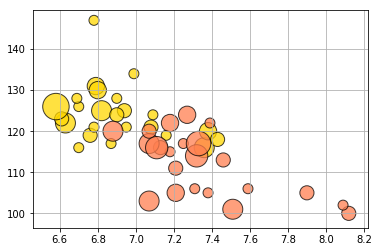

In [192]:
#Creating the graphs
plt.scatter(master_DB['3Cone'], master_DB['Broad Jump'], s=master_DB['ProBowl Appearances']*100, color = ['gold'], edgecolor = 'black', alpha = .75)
plt.scatter(master_DL['3Cone'], master_DL['Broad Jump'], s=master_DL['ProBowl Appearances']*100, color = ['coral'], edgecolor = 'black', alpha = .75)
plt.grid()

In [ ]:
#insert cell